## Thyroid Ultrasound Cine-clip Dataset
> We collected data from 167 patients with biopsy-confirmed thyroid nodules (n=192) at the Stanford University Medical Center. 
The dataset consists of ultrasound cine-clip images, radiologist-annotated segmentations, patient demographics, lesion size and location, TI-RADS descriptors, and histopathological diagnoses."  
SITE: https://stanfordaimi.azurewebsites.net/datasets/a72f2b02-7b53-4c5d-963c-d7253220bfd5 


## Launching notebooks locally
```
cd $HOME/repositories/github-projects/thyroid_deep_learning/data
conda activate transformersVE
jupyter notebook
```

## Datafiles
* dataset.hdf5 (36.42 GB) 
* metadata.csv(9.03 KB)


In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
HARD_DRIVE_PATH = '/media/mxochicale/Extreme SSD/' ## < Change this path to your datapath DRIVE

PATH_DATASETS = 'datasets/Thyroid_Ultrasound_Cine-clip/dataset.hdf5'
PATH_DATA_GITHUB = 'repositories/github-projects/thyroid_deep_learning/data/'
FULL_PATH_FOR_HDF5_FILE = os.path.join(HARD_DRIVE_PATH, PATH_DATASETS)
FULL_PATH_FOR_METADATA = os.path.join(HOME_PATH, PATH_DATA_GITHUB)
FULLPATH_METADATA_CSV = FULL_PATH_FOR_METADATA+'metadata.csv'


## metadata.csv(9.03 KB)

In [3]:
metadata_csv = pd.read_csv(FULLPATH_METADATA_CSV)
df_metadata = pd.DataFrame(metadata_csv)
df_metadata

#The dataset consists of ultrasound cine-clip images, 
#radiologist-annotated segmentations, patient demographics, lesion size and location,
#TI-RADS descriptors, and histopathological diagnoses."

,annot_id,age,sex,location,size_x,size_y,size_z,ti-rads_composition,ti-rads_echogenicity,ti-rads_shape,ti-rads_margin,ti-rads_echogenicfoci,ti-rads_level,histopath_diagnosis
0,1_,48,Female,right,4.0,3.4,3.2,2,1,0,0,0,3,0
1,2_,75,Male,right,1.6,1.2,1.3,1,1,0,0,0,2,0
2,3_,61,Female,right,1.1,1.0,1.7,2,2,0,0,3,5,0
3,4_,47,Male,left,3.0,3.6,4.1,1,2,0,0,0,3,0
4,5_,75,Female,left,1.5,1.7,1.1,2,1,0,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,210_,49,Female,right,1.9,1.2,1.0,1,1,0,0,0,2,0
188,211_,60,Female,right,6.2,4.7,7.3,2,1,0,0,0,3,0
189,212_,59,Male,right,2.7,2.0,3.5,2,1,0,0,0,3,0
190,213_,77,Female,right,1.8,1.1,2.2,2,1,0,0,0,3,0


=================== GENDER =======================


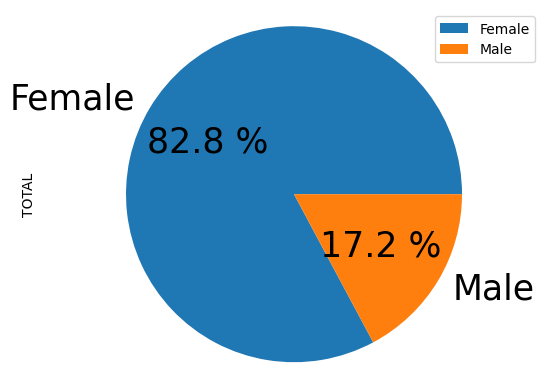

=================== histopath_diagnosis =======================


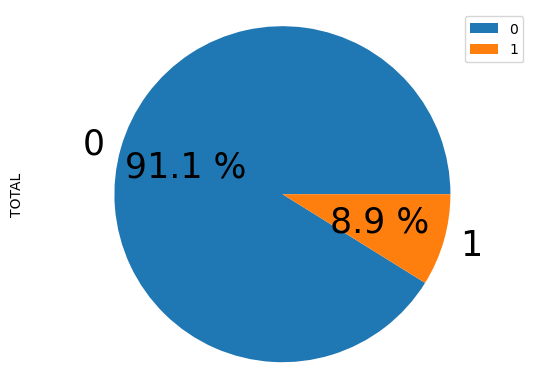

=================== AGE DISTRIBUTION =======================


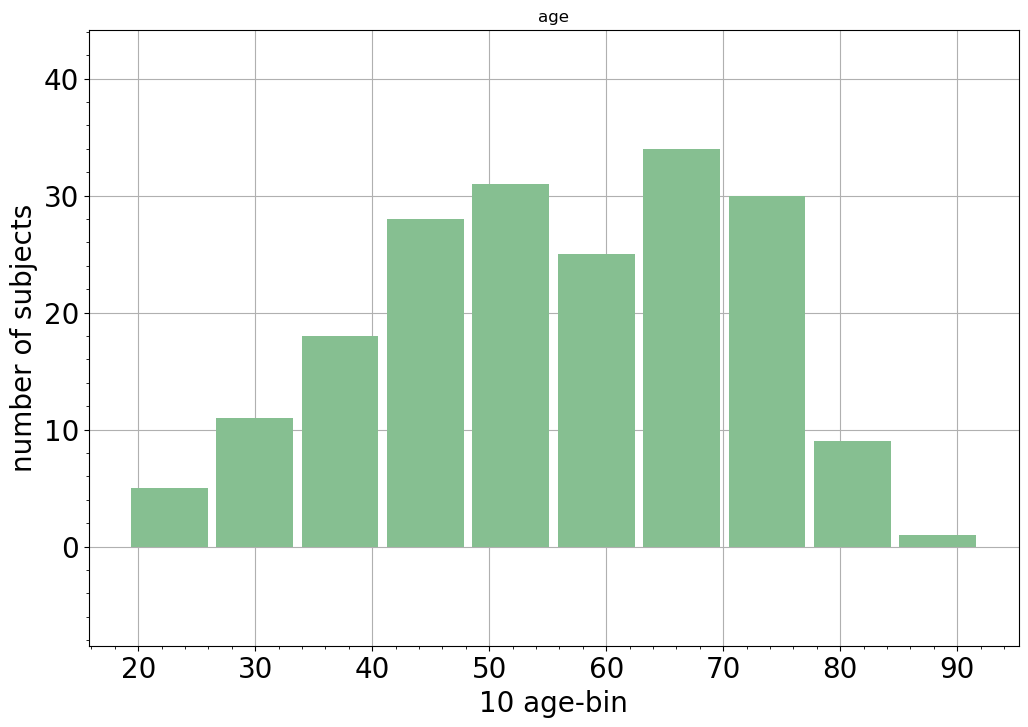

In [4]:
print(f'=================== GENDER =======================')
df_metadata['sex'].value_counts().plot.pie(autopct='%.1f %%', 
                                                  ylabel='TOTAL', 
                                                  legend=True, 
                                                  textprops={'fontsize': 25})
plt.axis('equal')
plt.show()


print(f'=================== histopath_diagnosis =======================')
df_metadata['histopath_diagnosis'].value_counts().plot.pie(autopct='%.1f %%', 
                                                  ylabel='TOTAL', 
                                                  legend=True, 
                                                  textprops={'fontsize': 25})
plt.axis('equal')
plt.show()

print(f'=================== AGE DISTRIBUTION =======================')
df_metadata.hist(column='age', bins=10, figsize=(12,8), grid=False, color='#86bf91', zorder=2, rwidth=0.9)
plt.axis('equal')
plt.xlabel('10 age-bin', fontsize=20)
plt.ylabel('number of subjects', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.minorticks_on()
plt.axis('equal')
plt.show()


## dataset.hdf5 (36.42 GB) 

In [5]:
f = h5py.File(FULL_PATH_FOR_HDF5_FILE, 'r')

for key in f.keys():
    print(key) #Names of the root level object names in HDF5 file - can be groups or datasets.
    print(type(f[key])) # get the object type: usually group or dataset


annot_id
<class 'h5py._hl.dataset.Dataset'>
frame_num
<class 'h5py._hl.dataset.Dataset'>
image
<class 'h5py._hl.dataset.Dataset'>
mask
<class 'h5py._hl.dataset.Dataset'>


In [6]:
annot_id_ = f.get('annot_id')
print(f'annot_id_: {annot_id_}')
print(f'annot_id_.shape: {annot_id_.shape}')

frame_num_ = f.get('frame_num')
print(f'frame_num_: {frame_num_}')
print(f'frame_num_.shape: {frame_num_.shape}')

image_ = f.get('image')
print(f'image_: {image_}')
print(f'image_.shape: {image_.shape}')

mask_ = f.get('mask')
print(f'mask_: {mask_}')
print(f'mask_.shape: {mask_.shape}')


annot_id_: <HDF5 dataset "annot_id": shape (17412,), type "|S4">
annot_id_.shape: (17412,)
frame_num_: <HDF5 dataset "frame_num": shape (17412,), type "|S3">
frame_num_.shape: (17412,)
image_: <HDF5 dataset "image": shape (17412, 802, 1054), type "|u1">
image_.shape: (17412, 802, 1054)
mask_: <HDF5 dataset "mask": shape (17412, 802, 1054), type "|u1">
mask_.shape: (17412, 802, 1054)


In [7]:
annot_id_list = list(f['annot_id'])
frame_num_list = list(f['frame_num'])
# print(annot_id_list)
# print(frame_num_list)

df_annot_id = pd.DataFrame(data=annot_id_list)
df_frame_number = pd.DataFrame(data=frame_num_list)

df_annot_frames = pd.concat ([
                    df_annot_id.rename(columns={0: "annot_id"}), 
                    df_frame_number.rename(columns={0: "frame_num"})
                ], 
                axis=1)

df_annot_frames

,annot_id,frame_num
0,b'129_',b'1'
1,b'129_',b'2'
2,b'129_',b'3'
3,b'129_',b'4'
4,b'129_',b'5'
...,...,...
17407,b'203_',b'67'
17408,b'203_',b'68'
17409,b'203_',b'69'
17410,b'203_',b'70'


In [8]:
print(df_annot_frames.to_string())

      annot_id frame_num
0      b'129_'      b'1'
1      b'129_'      b'2'
2      b'129_'      b'3'
3      b'129_'      b'4'
4      b'129_'      b'5'
5      b'129_'      b'6'
6      b'129_'      b'7'
7      b'129_'      b'8'
8      b'129_'      b'9'
9      b'129_'     b'10'
10     b'129_'     b'11'
11     b'129_'     b'12'
12     b'129_'     b'13'
13     b'129_'     b'14'
14     b'129_'     b'15'
15     b'129_'     b'16'
16     b'129_'     b'17'
17     b'129_'     b'18'
18     b'129_'     b'19'
19     b'129_'     b'20'
20     b'129_'     b'21'
21     b'129_'     b'22'
22     b'129_'     b'23'
23     b'129_'     b'24'
24     b'129_'     b'25'
25     b'129_'     b'26'
26     b'129_'     b'27'
27     b'129_'     b'28'
28     b'129_'     b'29'
29     b'129_'     b'30'
30     b'129_'     b'31'
31     b'129_'     b'32'
32     b'129_'     b'33'
33     b'129_'     b'34'
34     b'129_'     b'35'
35     b'129_'     b'36'
36     b'129_'     b'37'
37     b'129_'     b'38'
38     b'129_'     b'39'


In [9]:
frame_num_np = f['frame_num'][()]
print(type(frame_num_np))
print(frame_num_np)
print(frame_num_np.shape)

frame_num_np_ = np.array(frame_num_)
print(type(frame_num_np_))
print(frame_num_np_)
print(frame_num_np_.shape)


<class 'numpy.ndarray'>
[b'1' b'2' b'3' ... b'69' b'70' b'71']
(17412,)
<class 'numpy.ndarray'>
[b'1' b'2' b'3' ... b'69' b'70' b'71']
(17412,)
